The process of this notebook is to prepare a dataset for trait identification.

In [1]:
import pandas as pd

def process(text: str):
    from parse import compile
    from string import punctuation

    p = compile("{hit:d}.")
    in_list = text.split()
    out_list = list()
    for seg in in_list:
        parse_result = p.parse(seg)
        if parse_result:
            # We got a number with a dot afterward:
            out_list.append(seg.lower())
        else:
            out_list.append(seg.translate(str.maketrans("", "", punctuation)).lower())
    return " ".join(out_list)



df = pd.read_json("ParlaSpeech-HR.v1.0.jsonl", orient="records", lines=True)
df = pd.concat([df, df.speaker_info.apply(pd.Series)], axis=1)
df.head(3)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,split,norm_words_edited,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth
0,rFVDr4ghXlQ_10620.07-10632.05.wav,"20 2 2020 - 1. dio, 16. sjednica, 9. saziv [rF...",10620.07,10632.05,"[interpretacija,, inzistiranje, na, tim, dezin...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...","[interpretacija, inzistiranje, na, tim, dezinf...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...",ParlaMint-HR_S16.u4568,ParlaMint-HR_S16.u4568,...,train,NaN,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Tuđman, Miroslav",M,1946
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,"18 10 2018 - 9. sjednica, 9. saziv [Ki_SnDM_Ek...",2917.58,2937.50,"[izraelska, tvrtka, prodaje, avione, Hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...","[izraelska, tvrtka, prodaje, avione, hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...",ParlaMint-HR_S09.u4267,ParlaMint-HR_S09.u4267,...,dev,NaN,Regular,MP,"Živi zid, SNAGA",Klub Živog zida i SNAGA-e,Opposition,"Bunjac, Branimir",M,1972
2,XguZsDKdRh4_13797.59-13811.74.wav,"20 1 2017 - 3. sjednica, 9. saziv [XguZsDKdRh4...",13797.59,13811.74,"[jučer, trećem,, sutra, ili, prekosutra, četvr...","[0, 0.43, 1.0, 1.4, 1.52, 2.01, 2.55, 3.12, 3....","[jučer, trećem, sutra, ili, prekosutra, četvrt...","[0, 0.43, 1.0, 1.4, 1.52, 2.01, 2.55, 3.12, 3....",ParlaMint-HR_S03.u9702,ParlaMint-HR_S03.u9702,...,dev,NaN,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Bačić, Branko",M,1959


In [2]:
df.columns

Index(['path', 'orig_file', 'start', 'end', 'words', 'word_start_times',
       'norm_words', 'norm_words_start_times', 'utterance_id_start',
       'utterance_id_end', 'speaker_info', 'split', 'norm_words_edited',
       'Speaker_role', 'Speaker_type', 'Speaker_party', 'Speaker_party_name',
       'Party_status', 'Speaker_name', 'Speaker_gender', 'Speaker_birth'],
      dtype='object')

# Process transcription

In the same way as it was done for e.g. task8: lowercase, discard punctuation except where it follows a number.

In [3]:
df["processed_transcription"] = df.words.apply(" ".join).apply(process)
df.head(2)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,norm_words_edited,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,processed_transcription
0,rFVDr4ghXlQ_10620.07-10632.05.wav,"20 2 2020 - 1. dio, 16. sjednica, 9. saziv [rF...",10620.07,10632.05,"[interpretacija,, inzistiranje, na, tim, dezin...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...","[interpretacija, inzistiranje, na, tim, dezinf...","[0, 1.0, 1.83, 1.96, 2.22, 3.79, 4.01, 4.43, 5...",ParlaMint-HR_S16.u4568,ParlaMint-HR_S16.u4568,...,NaN,Regular,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Tuđman, Miroslav",M,1946,interpretacija inzistiranje na tim dezinformac...
1,Ki_SnDM_EkQ_2917.58-2937.5.wav,"18 10 2018 - 9. sjednica, 9. saziv [Ki_SnDM_Ek...",2917.58,2937.50,"[izraelska, tvrtka, prodaje, avione, Hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...","[izraelska, tvrtka, prodaje, avione, hrvatskoj...","[0, 0.65, 1.04, 1.54, 1.92, 2.51, 3.11, 3.5700...",ParlaMint-HR_S09.u4267,ParlaMint-HR_S09.u4267,...,NaN,Regular,MP,"Živi zid, SNAGA",Klub Živog zida i SNAGA-e,Opposition,"Bunjac, Branimir",M,1972,izraelska tvrtka prodaje avione hrvatskoj dire...


# Include party orientation

where data exists.

In [4]:
HR_party_orientation = {
'SDP':'center-left',
'HDZ':'center-right',
'Most':'right',
'Nezavisni':None,
'HSU, SNAGA, NZ i NP':'center-left',
'SDSS':'center-left',
'HNS':'center-left',
'BM 365 i NZ':'center-left',
'Živi zid, SNAGA':None,
'HSS i Demokrati':'center-right',
'GLAS':'center-left',
'HDS, HSLS, HDSSB':'center-right',
'NLM':'center-right',
'Živi zid i PH':None,
'IDS, PGS, RI':'center-left',
'HS':'right'}

df["Speaker_party_orientation"] = df.Speaker_party.apply(lambda i: HR_party_orientation.get(i, None))


In [5]:
df.Speaker_party_orientation.isna().sum()/df.Speaker_party_orientation.shape[0]

0.2342415052299313

We have 23% of instances without party information.

# Calculate duration

In [6]:
df["audio_length"] = df.end-df.start

In [7]:
df.sort_values(by="audio_length").head(3)

,path,orig_file,start,end,words,word_start_times,norm_words,norm_words_start_times,utterance_id_start,utterance_id_end,...,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_name,Speaker_gender,Speaker_birth,processed_transcription,Speaker_party_orientation,audio_length
266676,y5Rpk9AIbMY_16451.77-16451.85.wav,"3 10 2019 - 14. sjednica, 9. saziv [y5Rpk9AIbM...",16451.77,16451.85,[u],[0],[u],[0],ParlaMint-HR_S14.u2850,ParlaMint-HR_S14.u2850,...,MP,HDZ,Klub Hrvatske demokratske zajednice,Coalition,"Maksimčuk, Ljubica",F,1973,u,center-right,0.08
140513,Ipptk7Qntq4_6060.89-6060.99.wav,"12 12 2017 - 2. dio, 6. sjednica, 9. saziv [Ip...",6060.89,6060.99,[u],[0],[u],[0],ParlaMint-HR_S06.u6388,ParlaMint-HR_S06.u6388,...,MP,SDP,Klub Socijaldemokratske partije Hrvatske,Opposition,"Đujić, Saša",M,1981,u,center-left,0.10
377373,zIjE0oB5OIg_8854.59-8854.71.wav,"16 4 2020 - 16. sjednica, 9. saziv [zIjE0oB5OI...",8854.59,8854.71,[da],[0],[da],[0],ParlaMint-HR_S16.u9044,ParlaMint-HR_S16.u9044,...,MP,SDP,Klub Socijaldemokratske partije Hrvatske,Opposition,"Đujić, Saša",M,1981,da,center-left,0.12


# Calculate speaker age at the date of recording

In [8]:
df.head()

from datetime import datetime
def get_date_from_filename(s: str)->datetime:
    from parse import compile
    pattern = "{day:d} {month:d} {year:d} {rest}"

    p = compile(pattern)
    results = p.search(s)

    if not results:
        return None
    return datetime(results["year"], results["month"], results["day"])

df["recording_datetime"] = df.orig_file.apply(get_date_from_filename)


In [9]:
def get_speaker_age_at_recording(row):
    try:
        return row["recording_datetime"].year - int(row["Speaker_birth"])
    except ValueError:
        return None

df["Speaker_age_at_recording"] = df.apply(get_speaker_age_at_recording, axis=1)

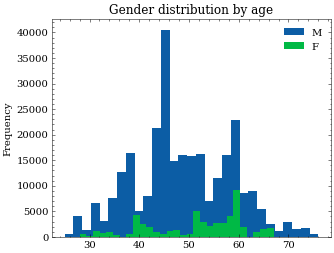

In [10]:
import matplotlib.pyplot as plt

try:
    plt.style.use("science no-latex".split())
except:
    pass
genders = ["M", "F"]

fig, ax = plt.subplots(figsize=(5, 4))
for gender in genders:
    df[df.Speaker_gender == gender].Speaker_age_at_recording.plot(
        kind="hist", ax=ax, label=gender, bins=29
    )
plt.legend()
plt.title("Gender distribution by age")
plt.show()


## Is the result different if we drop all the NaNs?

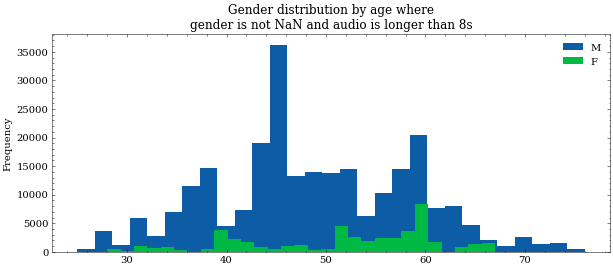

In [11]:
import matplotlib.pyplot as plt

try:
    plt.style.use("science no-latex".split())
except:
    pass
genders = ["M", "F"]

fig, ax = plt.subplots(figsize=(10, 4))
subdf = df[(~df.Speaker_age_at_recording.isna()) & (df.audio_length>8) ]
for gender in genders:
    subdf[subdf.Speaker_gender == gender].Speaker_age_at_recording.plot(
        kind="hist", ax=ax, label=gender, bins=29
    )
plt.legend()
plt.title("Gender distribution by age where\ngender is not NaN and audio is longer than 8s")
plt.show()


In [12]:
df.Speaker_age_at_recording.median()

48.0

In [13]:
df[df.Speaker_gender == "M"].Speaker_age_at_recording.median()

47.0

In [14]:
df[df.Speaker_gender == "F"].Speaker_age_at_recording.median()


54.0

In [15]:
df.loc[(df.Speaker_gender=="F") & (df.audio_length > 8), "audio_length"].sum() / 3600

286.51737777777777

In [16]:
df.isnull().any()[df.isnull().any()].index

Index(['speaker_info', 'split', 'norm_words_edited', 'Speaker_role',
       'Speaker_type', 'Speaker_party', 'Speaker_party_name', 'Party_status',
       'Speaker_name', 'Speaker_gender', 'Speaker_birth',
       'Speaker_party_orientation', 'Speaker_age_at_recording'],
      dtype='object')

In [17]:
df.Speaker_type.unique()

array(['MP', nan, 'notMP', '-'], dtype=object)

# First attempt

* Drop useless columns.
* Drop NaNs.
* Drop instances shorter than some length.
* Produce a balanced M-F dataset.

In [18]:
df.columns

columns_to_keep = [
    "path",
    "words",
    "split",
    "Speaker_role",
    "Speaker_type",
    "Speaker_party",
    "Speaker_party_name",
    "Party_status",
    "Speaker_name",
    "Speaker_gender",
    "Speaker_birth",
    "processed_transcription",
    "Speaker_party_orientation",
    "audio_length",
    "Speaker_age_at_recording",
]
min_length = 8
C_audio_longer_than_limit = df.audio_length > min_length
df1 = df.loc[C_audio_longer_than_limit, columns_to_keep].dropna()
df1.shape

(262978, 15)

Idea 1: go for max coverage (max number of speakers)

One by one include the least productive speakers until I have 400h of data.

In [19]:
valcounts = df1.Speaker_name.value_counts()[::-1]
accepted_speakers = list()
target_lentgh_hours = 400
for speaker in valcounts.index:
    gender_counter = df1[df1.Speaker_name.isin(accepted_speakers)].Speaker_gender.value_counts()
    M_count = gender_counter.get("M", 0)
    F_count = gender_counter.get("F", 0)

    current_gender = df1[df1.Speaker_name == speaker].Speaker_gender.values[0]

    if M_count > F_count:
        # We want female speakers
        if current_gender != "F":
            continue
        
    accepted_speakers.append(speaker)
    length = df1[df1.Speaker_name.isin(accepted_speakers)].audio_length.sum()
    if length > target_lentgh_hours * 3600:
        break

length / 3600

425.71000277777773

In [20]:
gb = df1[df1.Speaker_name.isin(accepted_speakers)].groupby("Speaker_name").agg({
    "Speaker_name": "count",
    "audio_length": sum,
    "Speaker_gender": lambda i: list(i)[0],
    'Speaker_age_at_recording':  "mean",
}).rename(columns={"Speaker_name": "count"})
gb


,count,audio_length,Speaker_gender,Speaker_age_at_recording
Speaker_name,,,,
"Ahmetović, Mirela",39,743.59,F,39.000000
"Alfirev, Marija",1679,27980.36,F,57.330554
"Balić, Marijana",239,4502.72,F,37.150628
"Baričević, Martin",122,1989.32,M,51.147541
"Bačić, Ante",1270,23030.29,M,34.699213
...,...,...,...,...
"Zmajlović, Mihael",363,6252.56,M,40.278237
"Ćelić, Ivan",1384,25438.04,M,42.315751
"Čikotić, Sonja",1032,18896.18,F,32.738372


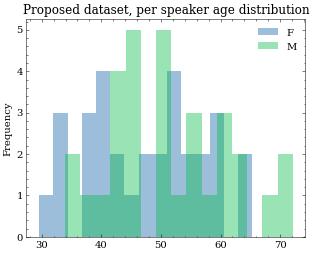

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))

for gender in ["M", "F"][::-1]:
    gb[gb.Speaker_gender == gender].Speaker_age_at_recording.plot.hist(
        label=gender, ax=ax, alpha=0.4, bins=15
    )
plt.legend()
plt.title("Proposed dataset, per speaker age distribution")
plt.show()


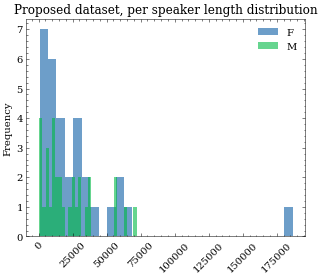

In [22]:
fig, ax = plt.subplots(figsize=(5, 4))

for gender in ["M", "F"][::-1]:
    gb[gb.Speaker_gender == gender].audio_length.plot.hist(
        label=gender, ax=ax, alpha=0.6, bins=30, rot=45, 
    )
plt.legend()
plt.title("Proposed dataset, per speaker length distribution")
plt.show()


In [23]:
gb.sort_values("audio_length")

,count,audio_length,Speaker_gender,Speaker_age_at_recording
Speaker_name,,,,
"Milinković, Dražen",26,471.95,M,55.000000
"Dragovan, Igor",40,686.07,M,50.075000
"Ahmetović, Mirela",39,743.59,F,39.000000
"Baričević, Martin",122,1989.32,M,51.147541
"Lekaj-Prljaskaj, Ermina",117,2094.34,F,46.794872
...,...,...,...,...
"Pusić, Vesna",3632,61397.07,F,65.298183
"Glasovac, Sabina",3623,64662.06,F,40.174165
"Hrelja, Silvano",3743,64899.45,M,59.969810


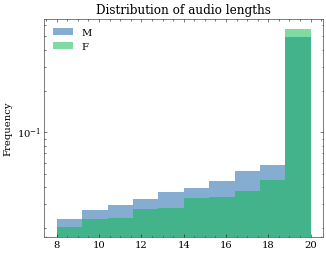

In [24]:
fig, ax = plt.subplots(figsize=(5, 4))


for gender in "MF":
    df1[
        df1.Speaker_name.isin(accepted_speakers) & (df1.Speaker_gender == gender)
    ].audio_length.plot.hist(ax=ax, density=True, label=gender, alpha=0.5)
plt.legend()
plt.title("Distribution of audio lengths")
plt.semilogy()
plt.show()


In [25]:
df1[df1.Speaker_name.isin(accepted_speakers)].audio_length.sum()

1532556.0099999998

In [26]:
gb.audio_length.sum()

1532556.0100000007

# Second attempt

From the paper:


Speaker identification (closed, 50 speakers, 100 instances in train per speaker, 10 in dev 10 in test, same in train, dev and test, each bin from different video subsets)

%Speaker verification (open)?

Gender (1000 training samples?, control for speaker and age)

Age (1000 training samples?, we need a histogram of age, quite likely will be a binary problem, or rather regression, control for speaker (and gender - or rather go with men only)) - two or three classes quite likely


In [27]:

columns_to_keep = [
    "path",
    "words",
    "split",
    "Speaker_role",
    "Speaker_type",
    "Speaker_party",
    "Speaker_party_name",
    "Party_status",
    "Speaker_name",
    "Speaker_gender",
    "Speaker_birth",
    "processed_transcription",
    "Speaker_party_orientation",
    "audio_length",
    "Speaker_age_at_recording",
]
min_length = 8
C_audio_longer_than_limit = df.audio_length > min_length
df2 = df.loc[C_audio_longer_than_limit, columns_to_keep].dropna()
df2.shape

(262978, 15)

In [28]:
gb = df2.groupby("Speaker_name").agg({
    "Speaker_name":  lambda i: list(i)[0],
    "audio_length": lambda i: sum(i) / 3600,
    "Speaker_gender":  lambda i: list(i)[0],
    "Speaker_age_at_recording": "median",
    "Speaker_party": "count"
}).rename(columns={"Speaker_party": "Count"}).sort_values(by="audio_length", ascending=False)
gb

,Speaker_name,audio_length,Speaker_gender,Speaker_age_at_recording,Count
Speaker_name,,,,,
"Bulj, Miro","Bulj, Miro",91.927733,M,46.0,19394
"Maras, Gordan","Maras, Gordan",65.979692,M,44.0,13316
"Mrak-Taritaš, Anka","Mrak-Taritaš, Anka",51.868417,F,59.0,10047
"Bačić, Branko","Bačić, Branko",34.452764,M,59.0,7266
"Žagar, Tomislav","Žagar, Tomislav",32.850731,M,49.0,6827
...,...,...,...,...,...
"Ahmetović, Mirela","Ahmetović, Mirela",0.206553,F,39.0,39
"Dragovan, Igor","Dragovan, Igor",0.190575,M,50.5,40
"Kustić, Marijan","Kustić, Marijan",0.173183,M,43.0,36


In [29]:
speakers_to_use = gb[gb.Speaker_gender=="M"].index[:35].tolist() + gb[gb.Speaker_gender=="F"].index[:35].tolist()
filtered_gb = gb.loc[speakers_to_use]
filtered_gb.shape

(66, 5)

In [30]:
gb[gb.Speaker_gender=="F"][:35]

,Speaker_name,audio_length,Speaker_gender,Speaker_age_at_recording,Count
Speaker_name,,,,,
"Mrak-Taritaš, Anka","Mrak-Taritaš, Anka",51.868417,F,59.0,10047
"Glasovac, Sabina","Glasovac, Sabina",17.961683,F,40.0,3623
"Pusić, Vesna","Pusić, Vesna",17.054742,F,65.0,3632
"Strenja-Linić, Ines","Strenja-Linić, Ines",15.958281,F,53.0,3127
"Perić, Grozdana","Perić, Grozdana",14.528253,F,57.0,3105
"Petrijevčanin Vuksanović, Irena","Petrijevčanin Vuksanović, Irena",11.198261,F,40.0,2201
"Makar, Božica","Makar, Božica",9.921461,F,59.0,1953
"Juričev-Martinčev, Branka","Juričev-Martinčev, Branka",9.658547,F,53.0,1923
"Jelkovac, Marija","Jelkovac, Marija",8.384558,F,47.0,1698


In [31]:
dataset_recognition = pd.concat([
    df2[df2.Speaker_name == name][0:100] for name in filtered_gb.index
])
dataset_recognition.shape

(6539, 15)

In [32]:
dataset_recognition.groupby("Speaker_name").count()

,path,words,split,Speaker_role,Speaker_type,Speaker_party,Speaker_party_name,Party_status,Speaker_gender,Speaker_birth,processed_transcription,Speaker_party_orientation,audio_length,Speaker_age_at_recording
Speaker_name,,,,,,,,,,,,,,
"Ahmetović, Mirela",39,39,39,39,39,39,39,39,39,39,39,39,39,39
"Aleksić, Goran",100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Alfirev, Marija",100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Babić, Ante",100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Balić, Marijana",100,100,100,100,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Čuraj, Stjepan",100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Đakić, Josip",100,100,100,100,100,100,100,100,100,100,100,100,100,100
"Đujić, Saša",100,100,100,100,100,100,100,100,100,100,100,100,100,100


# THird approach

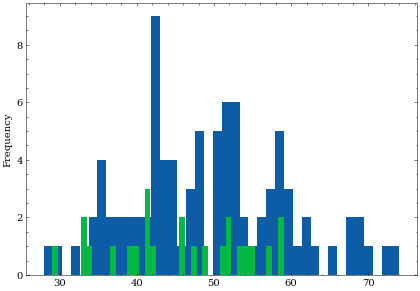

In [33]:
gb = df.groupby("Speaker_name").agg({
    "path": "count",
    "Speaker_age_at_recording": "median",
    "Speaker_gender": lambda i: i.iloc[0],
}).rename(columns={"path": "Count"}).sort_values(by="Count", ascending=False)
gb =  gb.loc[(gb.Count > 200) & (gb.Count < 3000)]

for gender in "MF":
    gb.Speaker_age_at_recording[gb.Speaker_gender == gender].plot(kind="hist", bins=40, figsize=(7,5))

In [34]:
sum(gb.Speaker_gender == "F")

42

In [35]:
C_is_female = gb.Speaker_gender == "F"
C_is_male = gb.Speaker_gender == "M"

females_train = gb.loc[C_is_female].index[0:25].tolist()
males_train = gb.loc[C_is_male].index[0:25].tolist()

females_test = gb.loc[C_is_female].index[25:25+5].tolist()
males_test = gb.loc[C_is_male].index[25:25+5].tolist()

In [36]:
train_gender = pd.concat([
    df[df.Speaker_name == name][0:20] for name in females_train+males_train
])
test_gender = pd.concat([
    df[df.Speaker_name == name][0:200] for name in females_test+males_test
])

In [37]:
train_gender.shape, test_gender.shape

((1000, 26), (2000, 26))

In [38]:
len(females_train), len(males_train), len(females_test), len(males_test)

(25, 25, 5, 5)

In [39]:
files_to_move = train_gender.path.tolist()+test_gender.path.tolist()

In [40]:
files_to_move

['IF1blZ6YSMA_14805.76-14812.79.wav',
 'on9WnAhubWg_12584.33-12599.73.wav',
 'IF1blZ6YSMA_15104.48-15124.11.wav',
 'IF1blZ6YSMA_15143.3-15163.11.wav',
 'wRedcoBr6Qk_10795.62-10814.97.wav',
 '9UCrtnKBgqs_15502.17-15521.49.wav',
 'wRedcoBr6Qk_10076.27-10088.25.wav',
 'HlauTe_NK6U_12901.39-12921.09.wav',
 'O-3YNW9gAaw_2696.35-2708.53.wav',
 'j2243qnSAZc_21233.62-21248.91.wav',
 '0m0xyKyqqlA_11494.42-11513.98.wav',
 'fZOW76tl9E8_4804.71-4824.57.wav',
 'Hr5kNf8OytU_20655.38-20675.35.wav',
 'amGNo5659ms_11461.98-11469.23.wav',
 'l8zdyfQzMbc_19852.92-19872.83.wav',
 '4f2EekXCNas_11009.41-11029.29.wav',
 'YFGScZznWNY_5003.74-5009.43.wav',
 'JxzqEMWNUro_18454.09-18474.04.wav',
 'HJps7tTjkpg_4081.55-4101.43.wav',
 'IF1blZ6YSMA_15234.5-15254.03.wav',
 '4KAefCQbnnM_19383.88-19398.79.wav',
 'vsnqvRMj2N8_6871.57-6891.57.wav',
 '8DJUjkE6g2A_8727.99-8738.17.wav',
 '4KAefCQbnnM_19102.16-19122.05.wav',
 'MpLv6KlBcpQ_21543.76-21563.16.wav',
 'SvOjrvZ4PlY_13370.79-13390.59.wav',
 'kr7AcaY6GaU_5109.05-5128

In [74]:
with open("files_to_move.txt", "w") as f:
    f.writelines(["seg."+ i + "\n" for i in files_to_move])

In [75]:
train_gender.to_csv("001_gender_train.csv", index=False)
train_gender.to_csv("001_gender_train.csv", index=False)